In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_raw = pd.read_csv("daily-bike-share.csv")

In [3]:
df_raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


A documentação diz o seguinte a respeito dos atributos dos dados:

The data consists of the following columns:

`instant`: A unique row identifier

`dteday`: The date on which the data was observed; in this case, the data was collected daily, so there's one row per date.

`season`: A numerically encoded value indicating the season (1:winter, 2:spring, 3:summer, 4:fall)

`yr`: The year of the study in which the observation was made (the study took place over two years: year 0 represents 2011, and year 1 represents 2012)

`mnth`: The calendar month in which the observation was made (1:January ... 12:December)

`holiday`: A binary value indicating whether or not the observation was made on a public holiday

`weekday`: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)

`workingday`: A binary value indicating whether or not the day is a working day (not a weekend or holiday)

`weathersit`: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)

`temp`: The temperature in celsius (normalized)

`atemp`: The apparent ("feels-like") temperature in celsius (normalized)

`hum`: The humidity level (normalized)

`windspeed`: The windspeed (normalized)

`rentals`: The number of bicycle rentals recorded.

In [5]:
df_raw['instant'].value_counts()

1      1
481    1
483    1
484    1
485    1
      ..
246    1
247    1
248    1
249    1
731    1
Name: instant, Length: 731, dtype: int64

In [6]:
df_raw['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [7]:
df_raw['yr'].value_counts()

1    366
0    365
Name: yr, dtype: int64

In [8]:
df_raw['holiday'].value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [9]:
df_raw['weekday'].value_counts()

6    105
0    105
1    105
2    104
3    104
4    104
5    104
Name: weekday, dtype: int64

In [10]:
df_raw['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [11]:
df_raw_numerical = df_raw[['temp','atemp','hum','windspeed']]
df_raw_numerical.head(3)

,temp,atemp,hum,windspeed
0,0.344167,0.363625,0.805833,0.160446
1,0.363478,0.353739,0.696087,0.248539
2,0.196364,0.189405,0.437273,0.248309


In [12]:
df_raw['rentals'].mean()

848.1764705882352

In [13]:
df_raw_numerical.describe()

,temp,atemp,hum,windspeed
count,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486
std,0.183051,0.162961,0.142429,0.077498
min,0.059130,0.079070,0.000000,0.022392
25%,0.337083,0.337842,0.520000,0.134950
50%,0.498333,0.486733,0.626667,0.180975
75%,0.655417,0.608602,0.730209,0.233214
max,0.861667,0.840896,0.972500,0.507463


### Data Exploration

In [14]:
# Primeiro vou deletar a coluna de identificação

df_raw.drop(columns=['instant'], inplace=True)

In [15]:
df_raw.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'rentals'],
      dtype='object')

In [16]:
# Agora vou transformar os dados que estão como numéricos para categóricos

df_categorical_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in df_categorical_columns:
    df_raw[col] = df_raw[col].astype('object')

print(df_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    object 
 4   holiday     731 non-null    object 
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    object 
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 74.4+ KB
None


#### Visualizando dados numéricos

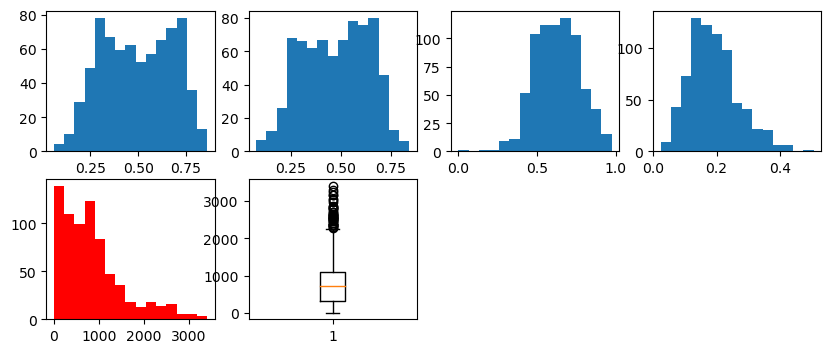

In [17]:
# analisando a distribuição dos dados

fig, axs = plt.subplots(2, 4, figsize=(10, 4))

axs[0,0].hist(df_raw['temp'], bins=15)
axs[0,1].hist(df_raw['atemp'], bins=15)
axs[0,2].hist(df_raw['hum'], bins=15)
axs[0,3].hist(df_raw['windspeed'], bins=15)
axs[1,0].hist(df_raw['rentals'], bins=15, color='red')
axs[1,1].boxplot(df_raw['rentals'])
axs[1,2].axis('off')
axs[1,3].axis('off')


plt.show()

In [18]:
# analisando a correlação dos dados numéricos com a variável alvo
import seaborn as sns

df_raw_numerical_w_target = df_raw_numerical

In [19]:
df_raw_numerical_w_target['rentals'] = df_raw['rentals']
df_raw_numerical_w_target.head(3)

C:\Users\gebal\AppData\Local\Temp\ipykernel_26372\1287484479.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_numerical_w_target['rentals'] = df_raw['rentals']


,temp,atemp,hum,windspeed,rentals
0,0.344167,0.363625,0.805833,0.160446,331
1,0.363478,0.353739,0.696087,0.248539,131
2,0.196364,0.189405,0.437273,0.248309,120


In [20]:
# calculando a correlação entre as variáveis numéricas
corr = df_raw_numerical_w_target.corr()

<AxesSubplot: >

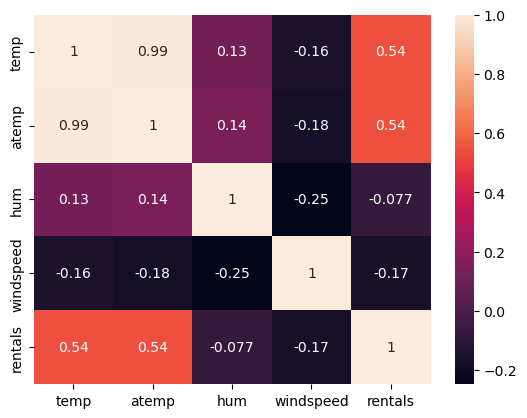

In [21]:
sns.heatmap(corr, annot=True)

Existe uma alta correlação entre a temperatura real (`temp`) e a sensação térmica (`atemp`), o que já era esperado. Agora, em relação a variável alvo, existe uma boa correlação entre a temperatura e a quantidade de aluguéis de bicicletas.

Sendo assim, antes de aplicar um algoritmo, é interessante selecionar apenas uma das colunas de temperatura a fim de evitar a multicolinearidade no modelo.

#### Visualizando dados categóricos

A visualização dos dados categóricos irá verificar se alguma categoria apresenta consideravelmente mais aluguéis de bicicletas do que a outra.

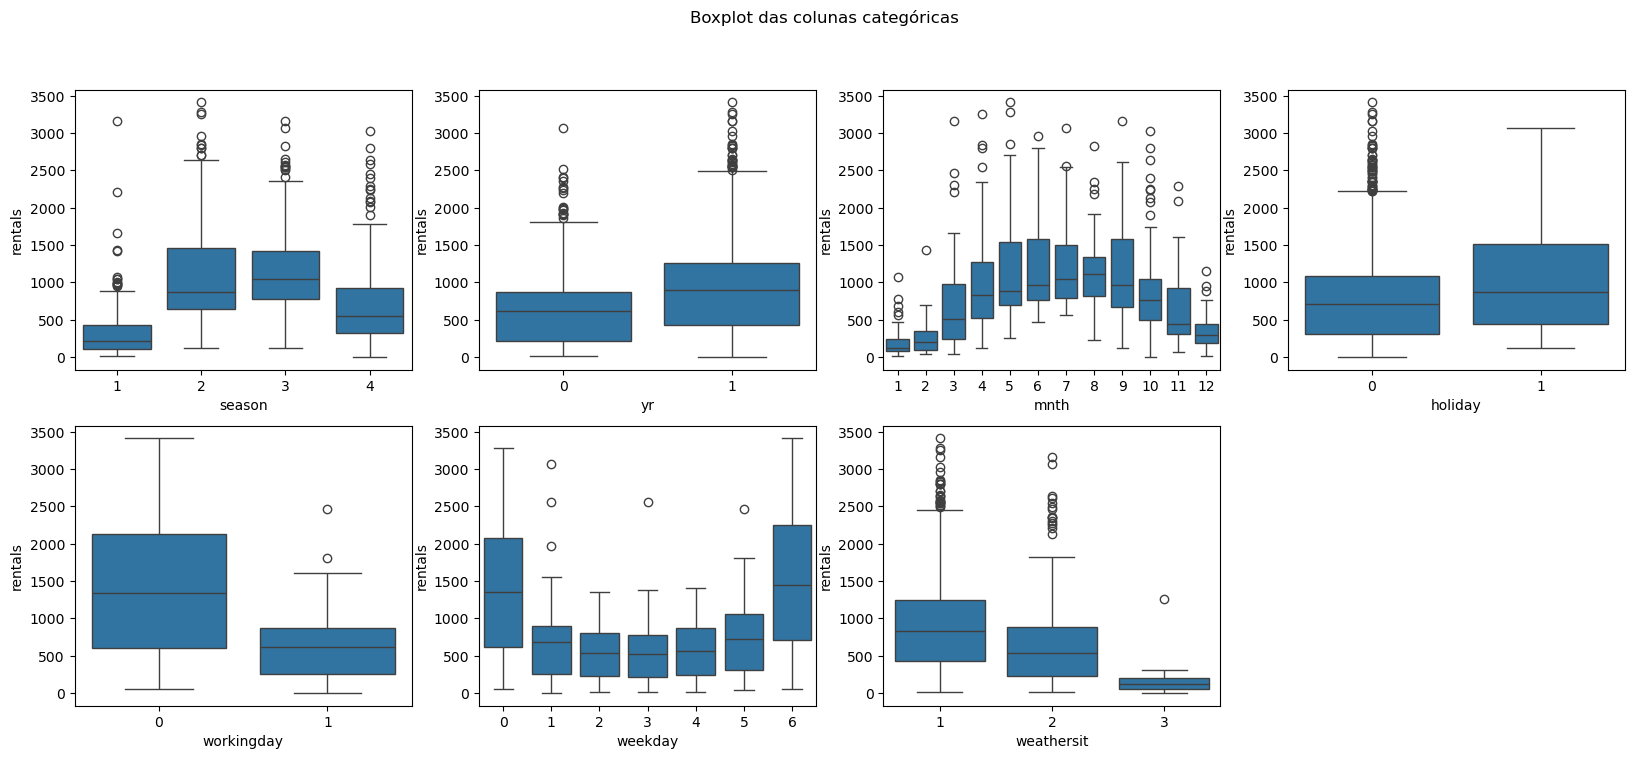

In [22]:
fig, axs = plt.subplots(2, 4, figsize=(20,8))

sns.boxplot(data=df_raw, x=df_raw['season'], y=df_raw['rentals'], ax=axs[0,0])
sns.boxplot(data=df_raw, x=df_raw['yr'], y=df_raw['rentals'], ax=axs[0,1])
sns.boxplot(data=df_raw, x=df_raw['mnth'], y=df_raw['rentals'], ax=axs[0,2])
sns.boxplot(data=df_raw, x=df_raw['holiday'], y=df_raw['rentals'], ax=axs[0,3])
sns.boxplot(data=df_raw, x=df_raw['weekday'], y=df_raw['rentals'], ax=axs[1,1])
sns.boxplot(data=df_raw, x=df_raw['workingday'], y=df_raw['rentals'], ax=axs[1,0])
sns.boxplot(data=df_raw, x=df_raw['weathersit'], y=df_raw['rentals'], ax=axs[1,2])
axs[1,3].axis('off')

fig.suptitle('Boxplot das colunas categóricas')
plt.show()
    

Essas visualizações trazem bastante informação. Vamos analizar cada imagem:

* Em `season`, existe uma maior quantidade de aluguéis em 2 e 3, que representam a primavera e o verão, respectivamente.
* Em `yr`, foi observado um aumento no número de aluguéis em 1 (2012), com relação a 0 (2011), o que pode significar que o negócio está crescendo.
* Em `mnth`, os meses com maiores quantidades médias de aluguéis são entre 6 e 9 (entre maio e setembro), que são justamente os meses de primavera e verão nos países do hemisfério norte.
* Em `holiday`, há uma quantidade maior de aluguéis em dias de feriado (1), do que em dias sem feriado (0).
* Em `workingday`, há uma maior quantidade de aluguéis em dias não úteis (0), do que em dias úteis (1).
* Em `weekdays`, há uma concentração maior de aluguéis nos finais de semana, sábado (6) e domingo (0), o que também concorda com os resultados gráficos da coluna `workingday`.
* Em `weathersit`, há uma quantidade maior de aluguéis nos dias de tempo limpo (1).

In [23]:
# # TESTE: VOU TIRAR A COLUNA `yr` PARA VER SE ATRAPALHA OU NÃO O MODELO, VISTO QUE ELE SÓ POSSUI DADOS DE MAIS DE 10 ANOS ATRÁS.
# df_raw.drop(columns=['yr'], inplace=True)

### Preparação dos dados

Nessa etapa os dados serão tratados para que possam ser incluídos em um algoritmo de regressão. Para isso, será necessário transformar os dados categóricos em dummys (0 ou 1) e 

In [24]:
df_raw.drop(columns=['yr'], inplace=True)

Como só possuem dois anos nos dados de treino (2011 e 2012), não é seguro usar essa coluna como atributo do modelo a ser treinado pelas seguintes razões:
1. O fato dos alguéis de 2012 serem maiores do que os de 2011 geraria muma tendência de crescimento linear (quanto maior o ano, maior a quantidade de aluguéis), que pode não representar a realidade de um negócio.
2. Existe poucas observações (apenas dois anos)
3. Apesar do modelo performar melhor com a inclusão desse atributo nos nossos dados de teste, ele provavelmente erraria mais ao aplicar em dados recentes.

In [25]:
df_raw.drop(columns=['rentals'])

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1/1/2011,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1/2/2011,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1/3/2011,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1/4/2011,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1/5/2011,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...
726,12/27/2012,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133
727,12/28/2012,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471
728,12/29/2012,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383
729,12/30/2012,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754


O atributo `dteday` também será removido, pois já possuímos colunas como ano e mês e resumem informações que poderíamos tirar dele.

In [26]:
df_ready = df_raw.drop(columns=['dteday'])

In [27]:
# Primeiro passo é dividir os dados em teste e treino
from sklearn.model_selection import train_test_split

X = df_ready.drop(columns=['rentals'])
y = df_ready['rentals']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=10)

In [28]:
# criando uma lista das colunas numéricas
df_numerical_columns = ['temp', 'atemp', 'hum', 'windspeed']

# já existe uma lista das colunas categóricas em df_categorical_columns

In [29]:
## Criando uma pipeline de dados

# importando as bibliotecas

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

# OBS: não será aplicado uma padronização de dados nos atributos numéricos, pois de acordo com a documentação esses dados já estão padronizados, caso contrário eles poderia mser padronizados nessa pipeline

# Aplicando as transformações
preprocessor = ColumnTransformer([
    ('num', 'passthrough', df_numerical_columns),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), df_categorical_columns)
])

# Aplicando a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Ridge(alpha=1.0))
])

In [30]:
# Treinando o modelo
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
# Realizando as previsões
y_pred = pipeline.predict(X_test)

#### Validando os dados

In [32]:
# Utilizando uma métrica para avaliar o modelo
from sklearn.metrics import r2_score, mean_squared_error


r2_ridge = r2_score(y_test, y_pred)
mse_ridge = np.sqrt(mean_squared_error(y_test,y_pred))

print(f'O valor do R² é: {(r2_ridge * 100):.2f}%')
print(f'O valor do MSE é: {mse_ridge:.2f}')

O valor do R² é: 65.26%
O valor do MSE é: 455.80


Conseguimos criar um modelo que explica 65% da variância dos dados, mas será que algum outro algoritmo conseguiria ter uma melhor performance?

### Aplicando outros algoritmos

In [33]:
# Aplicando Árvore de Regressão
from sklearn.tree import DecisionTreeRegressor

dt_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DecisionTreeRegressor(random_state=10))
])

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = np.sqrt(mean_squared_error(y_test,y_pred_dt))

print(f'O valor do R² é: {(r2_dt * 100):.2f}%')
print(f'O valor do MSE é: {mse_dt:.2f}')

O valor do R² é: 53.77%
O valor do MSE é: 525.80


A árvore de decisão apresentou um R² pior do que o ridge regression e também apresentou um maior MSE

In [34]:
# aplicando Support Vector Regressor
from sklearn.svm import SVR

svr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = np.sqrt(mean_squared_error(y_test,y_pred_svr))

print(f'O valor do R² é: {(r2_svr * 100):.2f}%')
print(f'O valor do MSE é: {mse_svr:.2f}')

O valor do R² é: -5.88%
O valor do MSE é: 795.73


O SVR não apresentou uma boa performance pois o MSE aumentou e o R² ficou negativo

In [35]:
# aplicando a Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=10))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = np.sqrt(mean_squared_error(y_test,y_pred_rf))

print(f'O valor do R² é: {(r2_rf * 100):.2f}%')
print(f'O valor do MSE é: {mse_rf:.2f}')

O valor do R² é: 76.41%
O valor do MSE é: 375.59


A Random Forest apresentou uma ótima performance. o MSE ficou abaixo de 400 e o R² acima de 75%

In [36]:
# Aplicando Lasso regressor
from sklearn.linear_model import Lasso

lasso_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', Lasso(alpha=0.1))
])

lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))

print(f'O valor do R² é: {(r2_lasso * 100):.2f}%')
print(f'O valor do MSE é: {mse_lasso:.2f}')

O valor do R² é: 65.68%
O valor do MSE é: 453.07


O Lasso demonstrou um desempenho bem semelhante ao Ridge regressor

In [37]:
# Aplicando o XGBoost regressor
from xgboost import XGBRegressor

xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=10))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = np.sqrt(mean_squared_error(y_test,y_pred_xgb))

print(f'O valor do R² é: {(r2_xgb * 100):.2f}%')
print(f'O valor do MSE é: {mse_xgb:.2f}')

O valor do R² é: 76.46%
O valor do MSE é: 375.22


o XGBoost apresentou um ótimo desempenho com o MSE abaixo de 380 e o R² acima de 75%


In [38]:
# Aplicando o Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=10))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = np.sqrt(mean_squared_error(y_test,y_pred_gb))

print(f'O valor do R² é: {(r2_gb * 100):.2f}%')
print(f'O valor do MSE é: {mse_gb:.2f}')

O valor do R² é: 76.71%
O valor do MSE é: 373.18


o Gradient Boosting também apresentou um ótimo desempenho com o MSE abaixo de 380 e o R² acima de 75%

### Comparando modelos

Agora o resultados dos modelos será comparado em uma tabela

In [39]:
models_used_list = ['Ridge Regressor', 'Lasso Regressor', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
model_type_list = ['interpretable model', 'interpretable model', 'black-box model', 'interpretable model', 'black-box model', 'black-box model', 'black-box model']
r_squares_list = [r2_ridge, r2_lasso, r2_svr, r2_dt, r2_rf, r2_gb, r2_xgb]
mse_list = [mse_ridge, mse_lasso, mse_svr, mse_dt, mse_rf, mse_gb, mse_xgb]

df_models = pd.DataFrame({
    'Algorithm': models_used_list,
    'R_square': r_squares_list,
    'MSE': mse_list,
    'Model_type': model_type_list
})

df_models.sort_values(by='R_square', ascending=False)

,Algorithm,R_square,MSE,Model_type
5,Gradient Boosting,0.767130,373.175442,black-box model
6,XGBoost,0.764571,375.219977,black-box model
4,Random Forest,0.764111,375.586315,black-box model
1,Lasso Regressor,0.656751,453.065563,interpretable model
0,Ridge Regressor,0.652590,455.803417,interpretable model
3,Decision Tree,0.537697,525.799007,interpretable model
2,SVR,-0.058805,795.727560,black-box model


Como o Gradient Boosting teve a melhor performance nas métricas escolhidas, ele será o modelo escolhido para a produção

## Salvando o modelo Gradient Boosting

Nessa etapa o modelo Gradient Boosting será salvo em um arquivo

In [40]:
print(gb_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('model', GradientBoostingRegressor(random_state=10))])


In [41]:
import joblib

joblib.dump(gb_model, 'modelo_gboosting.pkl')

['modelo_gboosting.pkl']

In [42]:
X_train.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [43]:
X_train.head(2)

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
72,1,3,0,1,1,1,0.325217,0.332000,0.496957,0.136926
510,2,5,0,5,1,1,0.680000,0.627529,0.747083,0.140550
